In [1]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Preparing and Reading Data

In [3]:
df = pd.read_csv("../train.csv");
features_col = ['MSSubClass','MSZoning','Utilities','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','ExterQual','ExterCond','Foundation','BsmtCond','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageQual']

X = df[features_col]
y = df['SalePrice']

In [4]:
MSZoning_Dummies = pd.get_dummies(df.MSZoning)
Utilities_Dummies = pd.get_dummies(df.Utilities)
BldgType_Dummies = pd.get_dummies(df.BldgType)
HouseStyle_Dummies = pd.get_dummies(df.HouseStyle)
ExterQual_Dummies = pd.get_dummies(df.ExterQual)
ExterCond_Dummies = pd.get_dummies(df.ExterCond)
RoofStyle_Dummies = pd.get_dummies(df.RoofStyle)
RoofMatl_Dummies = pd.get_dummies(df.RoofMatl)
Foundation_Dummies = pd.get_dummies(df.Foundation)
BsmtCond_Dummies = pd.get_dummies(df.BsmtCond)
Heating_Dummies = pd.get_dummies(df.Heating)
HeatingQC_Dummies = pd.get_dummies(df.HeatingQC)
CentralAir_Dummies = pd.get_dummies(df.CentralAir)
Electrical_Dummies = pd.get_dummies(df.Electrical)
KitchenQual_Dummies = pd.get_dummies(df.KitchenQual)
Functional_Dummies = pd.get_dummies(df.Functional)
FireplaceQu_Dummies = pd.get_dummies(df.FireplaceQu)
GarageQual_Dummies = pd.get_dummies(df.GarageQual)

X = pd.concat([X,MSZoning_Dummies,Utilities_Dummies,BldgType_Dummies,HouseStyle_Dummies,RoofStyle_Dummies,RoofMatl_Dummies,ExterQual_Dummies,ExterCond_Dummies,Foundation_Dummies,BsmtCond_Dummies,Heating_Dummies,HeatingQC_Dummies,CentralAir_Dummies,Electrical_Dummies,KitchenQual_Dummies,Functional_Dummies,FireplaceQu_Dummies,GarageQual_Dummies], axis='columns')
X = X.drop(['MSZoning','Utilities','BldgType','HouseStyle','RoofStyle','RoofMatl','ExterQual','ExterCond','Foundation','BsmtCond','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageQual'],axis='columns')

X

MSSubClass  OverallQual  OverallCond  YearBuilt  TotalBsmtSF  C (all)  \
0             60            7            5       2003          856        0   
1             20            6            8       1976         1262        0   
2             60            7            5       2001          920        0   
3             70            7            5       1915          756        0   
4             60            8            5       2000         1145        0   
...          ...          ...          ...        ...          ...      ...   
1455          60            6            5       1999          953        0   
1456          20            6            6       1978         1542        0   
1457          70            7            9       1941         1152        0   
1458          20            5            6       1950         1078        0   
1459          20            5            6       1965         1256        0   

      FV  RH  RL  RM  ...  Ex  Fa  Gd  Po  TA  Ex  Fa  Gd  Po  TA  
0      0   0   1   0  ...   0   0   0   0   0   0   0   0   0   1  
1      0   0   1   0  ...   0   0   0   0   1   0   0   0   0   1  
2      0   0   1   0  ...   0   0   0   0   1   0   0   0   0   1  
3      0   0   1   0  ...   0   0   1   0   0   0   0   0   0   1  
4      0   0   1   0  ...   0   0   0   0   1   0   0   0   0   1  
...   ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
1455   0   0   1   0  ...   0   0   0   0   1   0   0   0   0   1  
1456   0   0   1   0  ...   0   0   0   0   1   0   0   0   0   1  
1457   0   0   1   0  ...   0   0   1   0   0   0   0   0   0   1  
1458   0   0   1   0  ...   0   0   0   0   0   0   0   0   0   1  
1459   0   0   1   0  ...   0   0   0   0   0   0   0   0   0   1  

[1460 rows x 97 columns]

Scaling and Training Data

In [5]:
mms = MinMaxScaler()

X = pd.DataFrame(mms.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=0)

Performing ADA Boost Regressor

In [6]:
X, y = make_regression()

regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print(regr.score(X_train, y_train))

0.7655003542611079


Calculating RMSE

In [7]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('rmse: ', rmse)

rmse:  44553.65792038941


Calculating Cross Val Score

In [8]:
mse_list = cross_val_score(regr , X, y, cv=10, scoring='neg_mean_squared_error')

positive_mse_list = -mse_list

rmse_list = np.sqrt(positive_mse_list)

print('cross val score: ', rmse_list.mean())

cross val score:  106.52447533556929


Plotting Data from ADA Boost Regressor

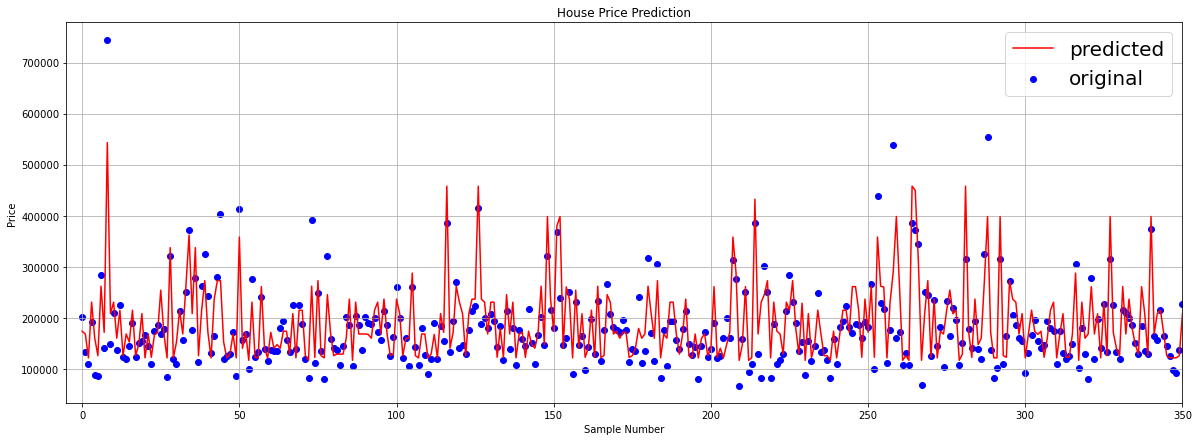

In [9]:
x_index = list(range(len(y_test)))

plt.figure(figsize=(20,7))
plt.scatter(x_index, y_test, color='blue', label='original')
plt.plot(x_index, y_pred, color='red', label='predicted')
plt.legend(prop={'size': 20})
plt.title('House Price Prediction')
plt.xlabel('Sample Number')
plt.ylabel('Price')

plt.xlim(-5, 350)
plt.grid()